In [2]:
import pandas as pd
import numpy as np
import geopandas as gp
import requests
import io 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline



In [3]:
response = requests.get('https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=1345&Year=1998&Month=11&Day=14&timeframe=2&submit= Download+Data')
df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
years = np.linspace(1999, 2018, 19)
years = np.round(years)


In [4]:
for i in years:
    i = i.astype(int)
    response = requests.get(f"https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=1345&Year={i}&Month=11&Day=14&timeframe=2&submit= Download+Data")
    if response.status_code == 200: #200 is an HTTP status code that means "everything is ok". ITs good to check the status_code in an if statement to avoid throwing and error
        df_temp = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
        df = df.append(df_temp)
        print(f'Appended df year{i} and the size of the new df is {df.shape}')
    else:
        print("Error: unable to retrieve weather data.  Server responded with status code", response.status_code)    
       

Appended df year1999 and the size of the new df is (730, 31)
Appended df year2000 and the size of the new df is (1096, 31)
Appended df year2001 and the size of the new df is (1461, 31)
Appended df year2002 and the size of the new df is (1826, 31)
Appended df year2003 and the size of the new df is (2191, 31)
Appended df year2004 and the size of the new df is (2557, 31)
Appended df year2005 and the size of the new df is (2922, 31)
Appended df year2006 and the size of the new df is (3287, 31)
Appended df year2007 and the size of the new df is (3652, 31)
Appended df year2008 and the size of the new df is (4018, 31)
Appended df year2010 and the size of the new df is (4383, 31)
Appended df year2011 and the size of the new df is (4748, 31)
Appended df year2012 and the size of the new df is (5114, 31)
Appended df year2013 and the size of the new df is (5479, 31)
Appended df year2014 and the size of the new df is (5844, 31)
Appended df year2015 and the size of the new df is (6209, 31)
Appended 

In [5]:
df.columns = [c.replace(' ', '_') for c in df.columns]


In [6]:
# sns.lineplot(df["Date/Time"], y=df["Snow_on_Grnd_(cm)"])

In [7]:
df['Month_Day']=(df['Month'].astype(str))+'/'+(df['Day'].astype(str))

In [8]:
df['Month_Day'].head()

0    1/1
1    1/2
2    1/3
3    1/4
4    1/5
Name: Month_Day, dtype: object

In [9]:
winter_df = df.loc[df['Month']<5]

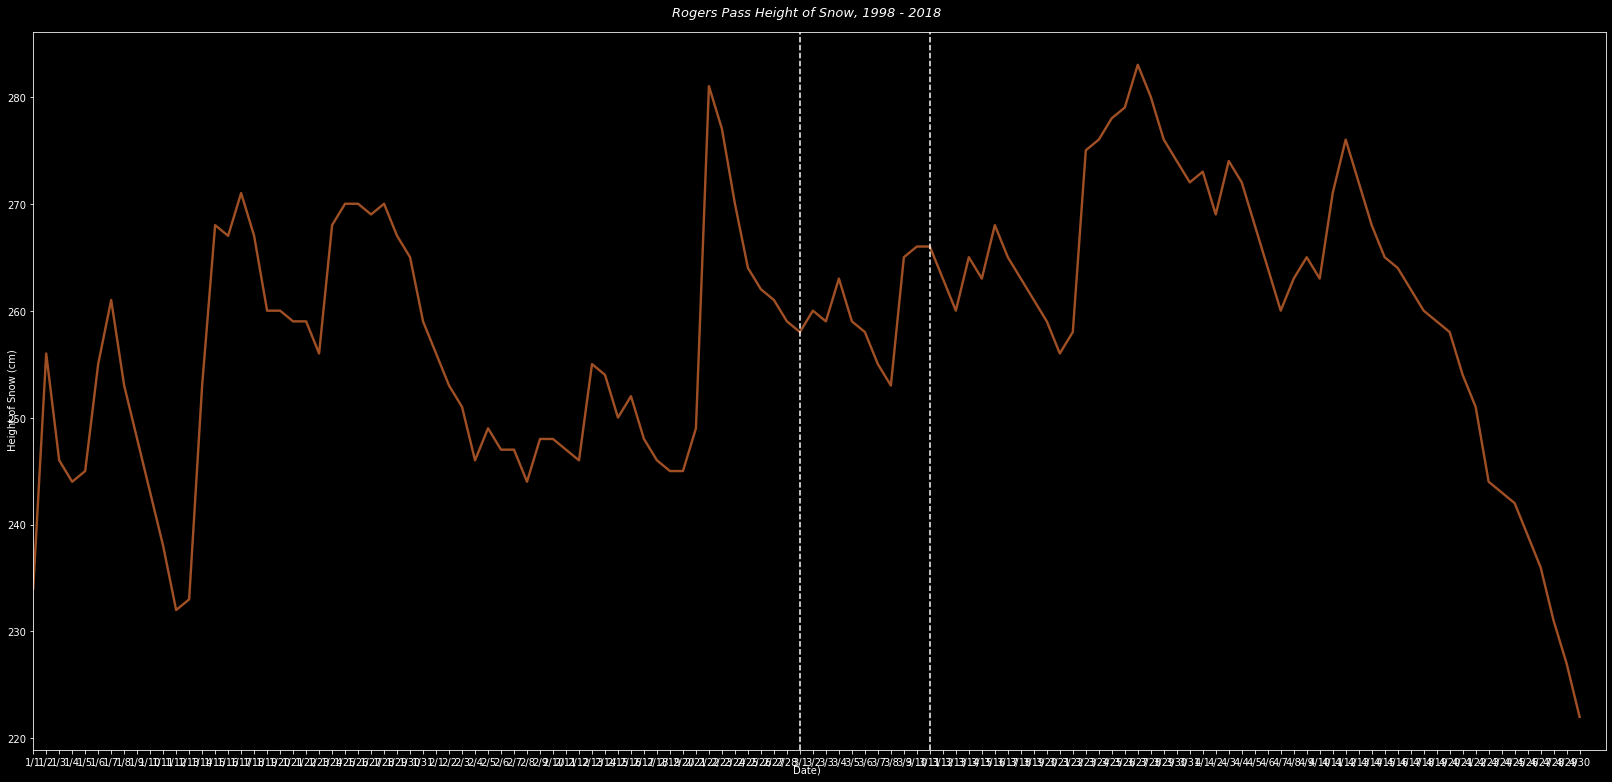

In [10]:
plt.style.use("dark_background")
palette = plt.get_cmap("Paired")

year = 1998
counter = 1998

row = 0
col =0

fig, axs = plt.subplots(nrows=1, ncols=1)

# axs.plot(winter_df["Date/Time"].loc[winter_df['Year']==year],
#                            winter_df["Snow_on_Grnd_(cm)"].loc[winter_df['Year']==year],
#                            marker="",
#                            color="white", 
#                            linewidth=0.6,
#                            alpha=0.3)
# # for each subplot, plot only one non-"hour" feature - via counter - in color
# # note: this where we'll input counter directly inside of palette()
axs.plot(winter_df["Month_Day"].loc[winter_df['Year']==year],
                   winter_df["Snow_on_Grnd_(cm)"].loc[winter_df['Year']==counter],
                   marker="",
                   color=palette(counter), 
                   linewidth=2.4,
                   alpha=0.9)
axs.axvline(x=59, color='w', linestyle='--')
axs.axvline(x=69, color='w', linestyle='--')


# set xlim and ylim for each subplot
axs.set_xlim(0,121)


fig.suptitle("Rogers Pass Height of Snow, 1998 - 2018", 
             fontsize=13, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
fig.set_size_inches(22.5, 10.5)  
# label axes
fig.text(0.5, 0.01, "Date)", ha="center", va="center")
fig.text(0.01, 0.5, "Height of Snow (cm)", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout()

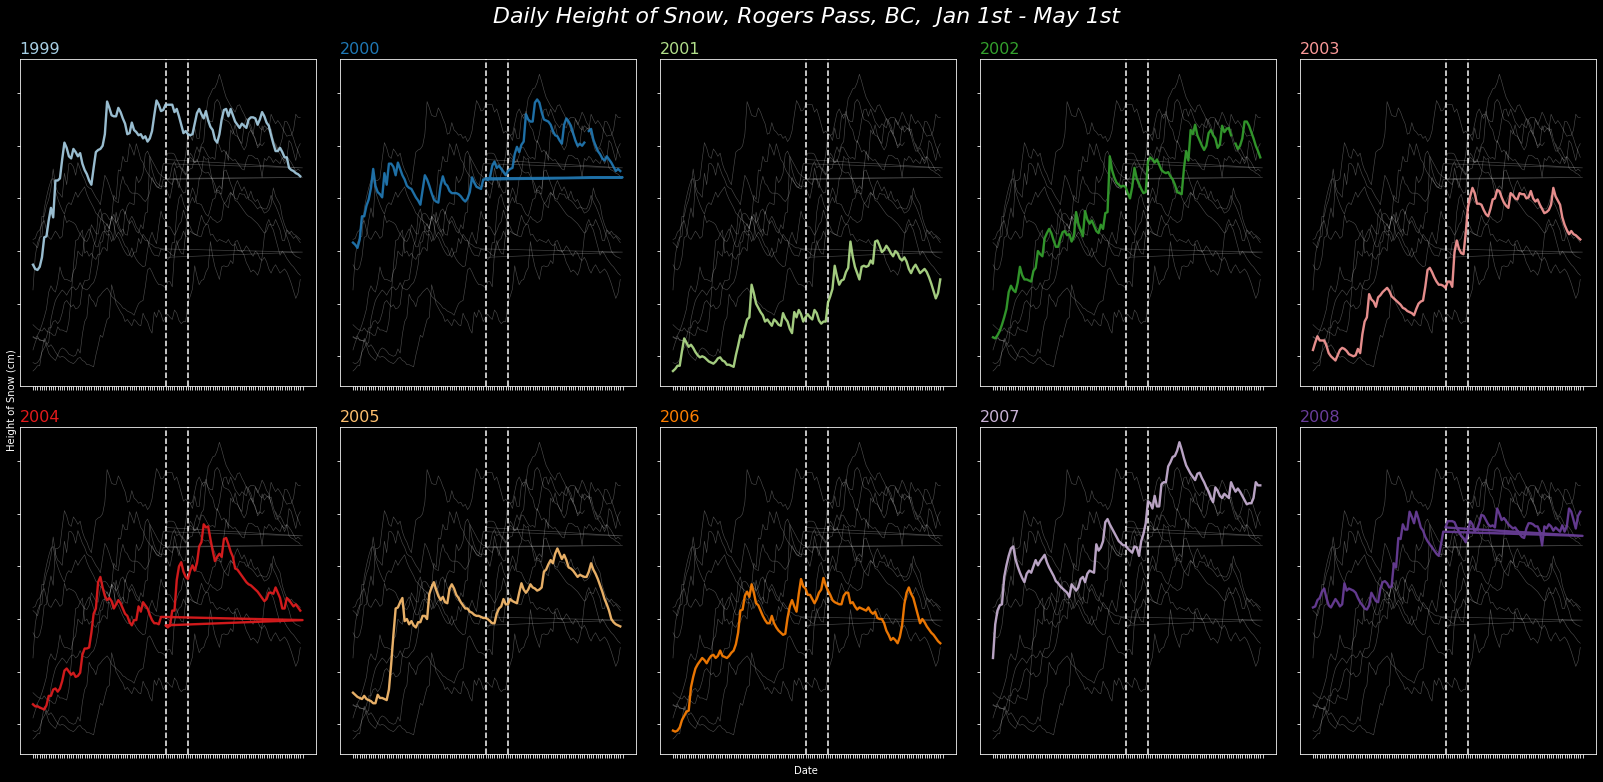

In [11]:
# create a color palette and set style
plt.style.use("dark_background")
palette = plt.get_cmap("Paired")
# create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=5)

# counter will store the feature index to use when highlighting a particular teammate in each subplot
counter = 1999
counter_2 = 0
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]

# begin the nested for loop to access each individual subplot within the 3x3 grid
# note: we are subsetting each subplot via axs[row, col]
for row in range(axs.shape[0]):
   
    for col in range(axs.shape[1]):
        axs[row,col].axvline(x=59, color='w', linestyle='--')
        axs[row,col].axvline(x=69, color='w', linestyle='--')
            # plot every feature in each subplot as a white line
        for year in years:
            axs[row, col].plot(winter_df["Month_Day"].loc[winter_df['Year']==year],
                           winter_df["Snow_on_Grnd_(cm)"].loc[winter_df['Year']==year],
                           marker="",
                           color="white", 
                           linewidth=0.6,
                           alpha=0.3)
        # for each subplot, plot only one non-"hour" feature - via counter - in color
        # note: this where we'll input counter directly inside of palette()

        axs[row, col].plot(winter_df["Month_Day"].loc[winter_df['Year']==counter],
                           winter_df["Snow_on_Grnd_(cm)"].loc[winter_df['Year']==counter],
                           marker="",
                           color=palette(counter_2), 
                           linewidth=2.4,
                           alpha=0.9)

        # set xlim and ylim for each subplot
#         axs[row, col].set_xlim(0,10)
#         axs[row, col].set_ylim(-2,22)

#         remove x-axis tick marks from the first two rows of subplots

        axs[row, col].tick_params(labelbottom=False)
        # remove the y-axis tick marks from the second and third columns of subplots

        axs[row, col].tick_params(labelleft=False)          

        # assign each subplot a title based on the one non-"hour" feature that was highlighted in color
        axs[row, col].set_title(str(counter), 
                                loc="left", 
                                fontsize=16, 
                                fontweight=0, 
                                color=palette(counter_2))

        # now that we're done with this subplot, add one to counter so the next teammate is highlighted
        counter += 1
        counter_2 += 1
         
fig.suptitle("Daily Height of Snow, Rogers Pass, BC,  Jan 1st - May 1st", 
             fontsize=22, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
fig.set_size_inches(22.5, 10.5)  
# label axes
fig.text(0.5, 0.01, "Date", ha="center", va="center")
fig.text(0.01, 0.5, "Height of Snow (cm)", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout(pad = 2)

fig.savefig("hs_small_multiples.png",
            dpi=200,
            bbox_inches="tight")

In [12]:
feb_march_df = winter_df.loc[(winter_df['Month']==2) | (winter_df['Month']==3)]
feb_march_df.loc[np.isnan(feb_march_df["Total_Snow_(cm)"])] = 0

/Users/brentsair/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
month_day = pd.DataFrame(feb_march_df['Month_Day'])

In [14]:
month_day = pd.get_dummies(month_day['Month_Day'], drop_first=True)

In [15]:
import statsmodels.api as sm
X = sm.add_constant(month_day)
y = feb_march_df['Total_Snow_(cm)']

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Snow_(cm)   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     5.501
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           4.91e-33
Time:                        17:23:25   Log-Likelihood:                -3946.0
No. Observations:                1185   AIC:                             8014.
Df Residuals:                    1124   BIC:                             8324.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.516e-15      0.354  -4.28e-15      1.000      -0.694       0.694
2/1            9.6154      1.957      4.912      0.000       5.775      13.456
2/10           6.3077      1.957      3.223      0.001       2.467      10.148
2/11           6.3846      1.957      3.262      0.001       2.544      10.225
2/12          10.1538      1.957      5.187      0.000       6.313      13.994
2/13           7.2308      1.957      3.694      0.000       3.390      11.071
2/14           5.1538      1.957      2.633      0.009       1.313       8.994
2/15           8.3846      1.957      4.284      0.000       4.544      12.225
2/16           5.3846      1.957      2.751      0.006       1.544       9.225
2/17           3.3846      1.957      1.729      0.084      -0.456       7.225
2/18           5.6154      1.957      2.869      0.004       1.775       9.456
2/19           6.9231      1.957      3.537      0.000       3.083      10.764
2/2            7.0000      1.957      3.576      0.000       3.159      10.841
2/20           6.0000      1.957      3.065      0.002       2.159       9.841
2/21          12.3846      1.957      6.327      0.000       8.544      16.225
2/22           4.6154      1.957      2.358      0.019       0.775       8.456
2/23           3.6923      1.957      1.886      0.060      -0.148       7.533
2/24           2.1538      1.957      1.100      0.271      -1.687       5.994
2/25           4.3846      1.957      2.240      0.025       0.544       8.225
2/26           5.7692      1.957      2.947      0.003       1.929       9.610
2/27           5.5385      1.957      2.830      0.005       1.698       9.379
2/28           3.6154      1.957      1.847      0.065      -0.225       7.456
2/29           3.0000      4.921      0.610      0.542      -6.655      12.655
2/3            7.3077      1.957      3.733      0.000       3.467      11.148
2/4            9.4615      1.957      4.834      0.000       5.621      13.302
2/5            5.6154      1.957      2.869      0.004       1.775       9.456
2/6            6.0000      1.957      3.065      0.002       2.159       9.841
2/7            5.6923      1.957      2.908      0.004       1.852       9.533
2/8            4.7692      1.957      2.437      0.015       0.929       8.610
2/9            5.5385      1.957      2.830      0.005       1.698       9.379
3/1            3.8571      1.889      2.042      0.041       0.152       7.563
3/10          11.7857      1.889      6.241      0.000       8.080      15.491
3/11           8.1429      1.889      4.312      0.000       4.437      11.848
3/12           8.3571      1.889      4.425      0.000       4.652      12.063
3/13           9.1429      1.889      4.841      0.000       5.437      12.848
3/14           6.5000      1.889      3.442      0.001       2.795      10.205
3/

In [16]:
coef_list = list(model.params)
coef_list.pop(0)
coef_df = pd.DataFrame(coef_list, columns=['Coef'])
dates_df = pd.DataFrame(month_day.columns, columns=['Day'])
coef_df = coef_df.join(dates_df)

<BarContainer object of 60 artists>

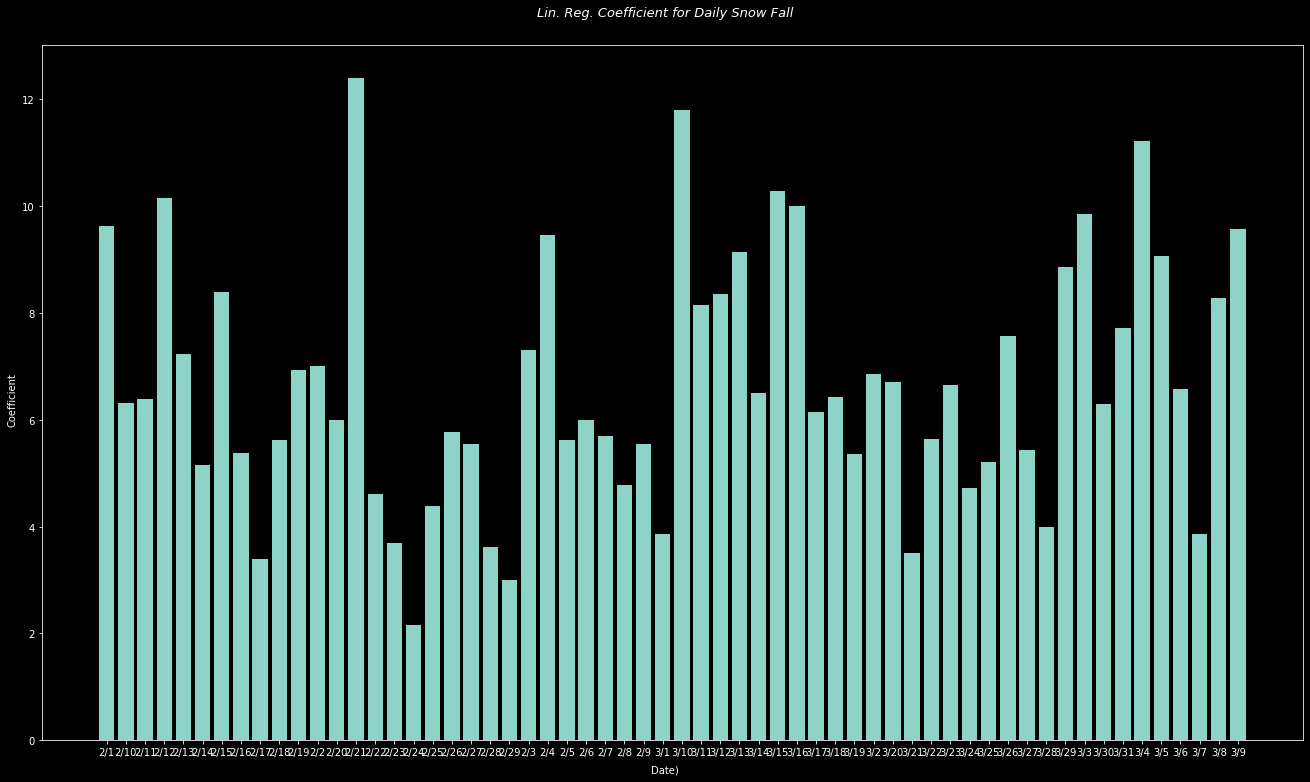

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1)

fig.suptitle("Lin. Reg. Coefficient for Daily Snow Fall", 
             fontsize=13, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
fig.set_size_inches(18.5, 10.5)  
# label axes
fig.text(0.5, 0.01, "Date)", ha="center", va="center")
fig.text(0.01, 0.5, "Coefficient", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout(pad = 2)
plt.bar(x=coef_df['Day'], height = coef_df['Coef'])


In [18]:
date_converted = pd.to_datetime(df['Date/Time'])
df['Date/Time']=date_converted
df= df.set_index(df['Date/Time'])
df['Year']= df.index.year
df['Month']=df.index.month
df['Day_Name']=df.index.weekday_name
df['Day_of_Year']=df.index.dayofyear
df['Day_of_Month'] = df.index.day

In [19]:
df.Day_of_Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [20]:
winter_df_2 = df.loc[df['Month']<5]

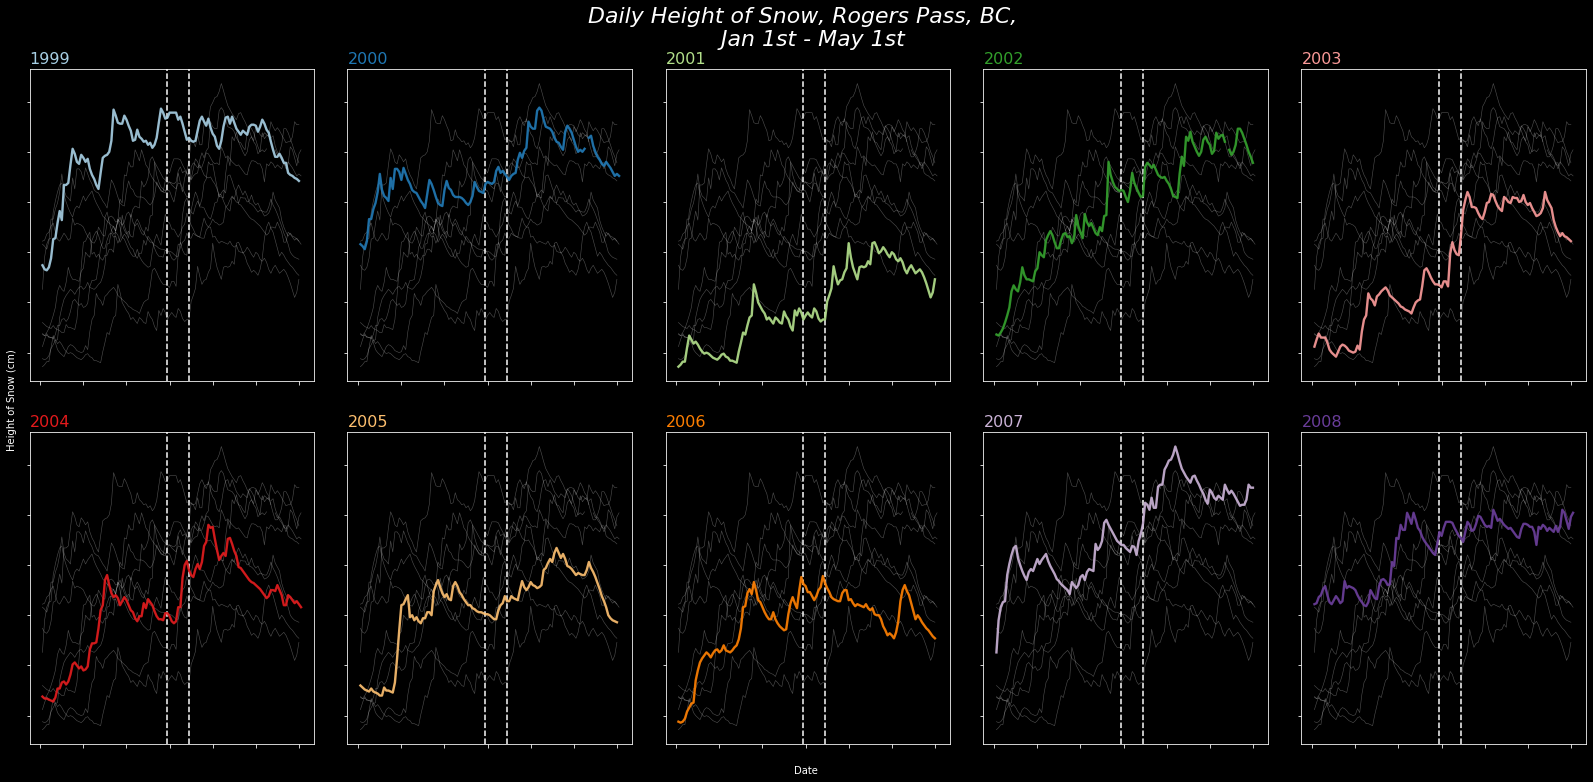

In [55]:
# create a color palette and set style
plt.style.use("dark_background")
palette = plt.get_cmap("Paired")
# create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=5)

# counter will store the feature index to use when highlighting a particular teammate in each subplot
counter = 1999
counter_2 = 0
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]

# begin the nested for loop to access each individual subplot within the 3x3 grid
# note: we are subsetting each subplot via axs[row, col]
for row in range(axs.shape[0]):
   
    for col in range(axs.shape[1]):
        axs[row,col].axvline(x=59, color='w', linestyle='--')
        axs[row,col].axvline(x=69, color='w', linestyle='--')
            # plot every feature in each subplot as a white line
        for year in years:
            axs[row, col].plot(winter_df_2.Day_of_Year.loc[str(year)],
                           winter_df_2['Snow_on_Grnd_(cm)'].loc[str(year)],
                           marker="",
                           color="white", 
                           linewidth=0.6,
                           alpha=0.3)
        # for each subplot, plot only one non-"hour" feature - via counter - in color
        # note: this where we'll input counter directly inside of palette()

        axs[row, col].plot(winter_df_2.Day_of_Year.loc[str(counter)],
                           winter_df_2['Snow_on_Grnd_(cm)'].loc[str(counter)],
                           marker="",
                           color=palette(counter_2), 
                           linewidth=2.4,
                           alpha=0.9)

        # set xlim and ylim for each subplot
#         axs[row, col].set_xlim(0,10)
#         axs[row, col].set_ylim(-2,22)

#         remove x-axis tick marks from the first two rows of subplots

        axs[row, col].tick_params(labelbottom=False)
        # remove the y-axis tick marks from the second and third columns of subplots

        axs[row, col].tick_params(labelleft=False)          

        # assign each subplot a title based on the one non-"hour" feature that was highlighted in color
        axs[row, col].set_title(str(counter), 
                                loc="left", 
                                fontsize=16, 
                                fontweight=0, 
                                color=palette(counter_2))
                                       

        # now that we're done with this subplot, add one to counter so the next teammate is highlighted
        counter += 1
        counter_2 += 1
         
fig.suptitle("Daily Height of Snow, Rogers Pass, BC, \n  Jan 1st - May 1st", 
             fontsize=22, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
fig.set_size_inches(22.5, 10.5)  
# label axes
fig.text(0.5, 0.01, "Date", ha="center", va="center")
fig.text(0.01, 0.5, "Height of Snow (cm)", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout(pad = 3)

fig.savefig("hs_small_multiples.png",
            dpi=200,
            bbox_inches="tight")

In [22]:
feb_march_df_2 = winter_df_2.loc[(winter_df_2['Month']==2)|(winter_df_2['Month']==3)]
feb_march_df_2.loc[np.isnan(feb_march_df_2["Total_Snow_(cm)"])] = 0
X_2 = feb_march_df_2['Day_of_Year']
y_2 = feb_march_df_2['Total_Snow_(cm)']
X_2 = pd.get_dummies(X_2, drop_first=True)

/Users/brentsair/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [23]:

X_2_int = sm.add_constant(X_2)

model = sm.OLS(y_2, X_2_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Snow_(cm)   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     5.568
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           1.37e-33
Time:                        17:23:49   Log-Likelihood:                -3944.4
No. Observations:                1185   AIC:                             8011.
Df Residuals:                    1124   BIC:                             8321.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.867e-13      0.353  -5.29e-13      1.000      -0.693       0.693
32             9.6154      1.955      4.919      0.000       5.780      13.451
33             7.0000      1.955      3.581      0.000       3.165      10.835
34             7.3077      1.955      3.739      0.000       3.472      11.143
35             9.4615      1.955      4.840      0.000       5.626      13.297
36             5.6154      1.955      2.873      0.004       1.780       9.451
37             6.0000      1.955      3.070      0.002       2.165       9.835
38             5.6923      1.955      2.912      0.004       1.857       9.528
39             4.7692      1.955      2.440      0.015       0.934       8.605
40             5.5385      1.955      2.833      0.005       1.703       9.374
41             6.3077      1.955      3.227      0.001       2.472      10.143
42             6.3846      1.955      3.266      0.001       2.549      10.220
43            10.1538      1.955      5.195      0.000       6.319      13.989
44             7.2308      1.955      3.699      0.000       3.395      11.066
45             5.1538      1.955      2.637      0.008       1.319       8.989
46             8.3846      1.955      4.289      0.000       4.549      12.220
47             5.3846      1.955      2.755      0.006       1.549       9.220
48             3.3846      1.955      1.732      0.084      -0.451       7.220
49             5.6154      1.955      2.873      0.004       1.780       9.451
50             6.9231      1.955      3.542      0.000       3.088      10.758
51             6.0000      1.955      3.070      0.002       2.165       9.835
52            12.3846      1.955      6.336      0.000       8.549      16.220
53             4.6154      1.955      2.361      0.018       0.780       8.451
54             3.6923      1.955      1.889      0.059      -0.143       7.528
55             2.1538      1.955      1.102      0.271      -1.681       5.989
56             4.3846      1.955      2.243      0.025       0.549       8.220
57             5.7692      1.955      2.951      0.003       1.934       9.605
58             5.5385      1.955      2.833      0.005       1.703       9.374
59             3.6154      1.955      1.850      0.065      -0.220       7.451
60             3.0833      2.032      1.517      0.129      -0.904       7.070
61             5.0000      1.886      2.651      0.008       1.300       8.700
62             7.9286      1.886      4.204      0.000       4.228      11.629
63            12.9286      1.886      6.855      0.000       9.228      16.629
64             9.0714      1.886      4.810      0.000       5.371      12.772
65             6.7857      1.886      3.598      0.000       3.085      10.486
66             6.0000      1.886      3.181      0.002       2.300       9.700
67

In [24]:
coef_list = list(model.params)
coef_list.pop(0)
coef_df = pd.DataFrame(coef_list, columns=['Coef'])
dates_df = pd.DataFrame(X_2.columns, columns=['Day_of_Year'])
coef_df = coef_df.join(dates_df)


<BarContainer object of 60 artists>

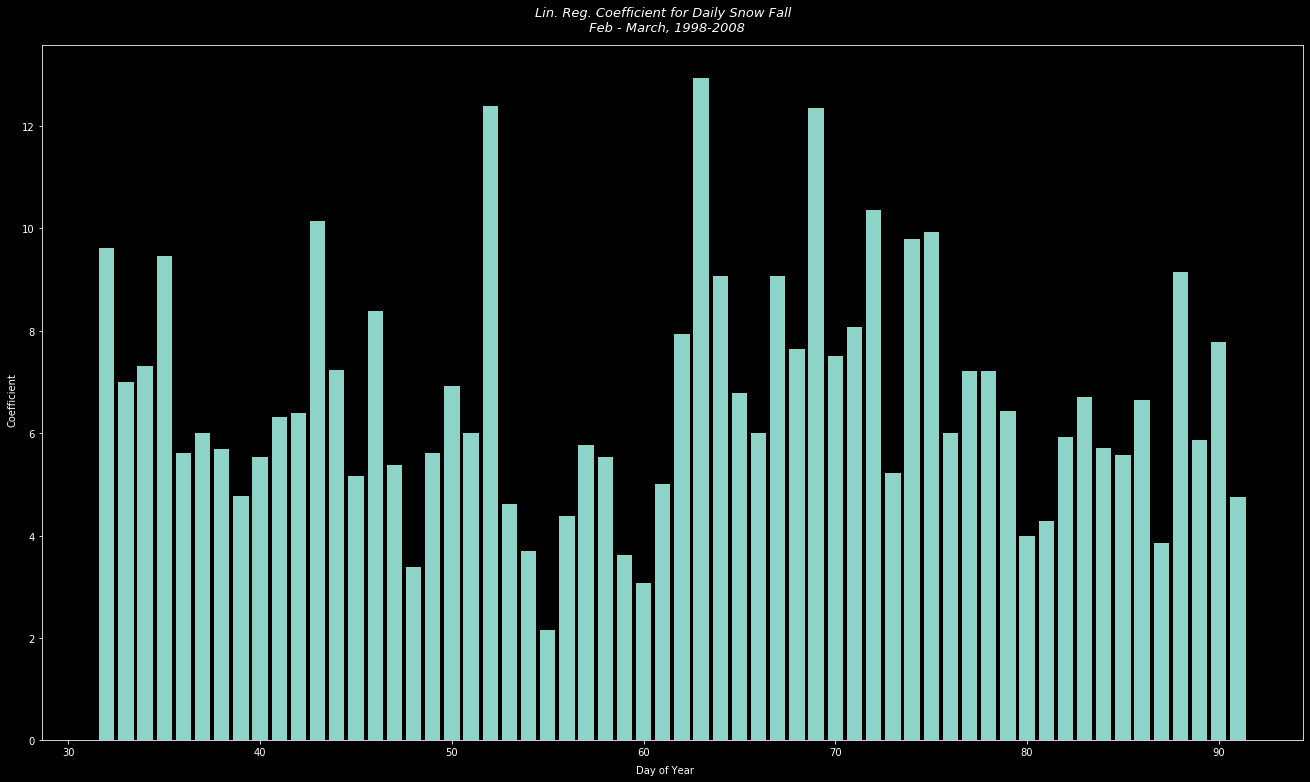

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=1)

fig.suptitle("Lin. Reg. Coefficient for Daily Snow Fall \n Feb - March, 1998-2008", 
             fontsize=13, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
fig.set_size_inches(18.5, 10.5)  
# label axes
fig.text(0.5, 0.01, "Day of Year", ha="center", va="center")
fig.text(0.01, 0.5, "Coefficient", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout(pad = 2)
plt.bar(x=coef_df['Day_of_Year'], height = coef_df['Coef'])

In [30]:
coef_df['10_day_snow_coef_sum'] = coef_df.iloc[:,0].rolling(window=10).sum()
coef_df.tail()

,Coef,Day_of_Year,10_day_snow_coef_sum
55,3.857143,87,56.357143
56,9.142857,88,58.285714
57,5.857143,89,57.714286
58,7.785714,90,61.500000
59,4.750000,91,61.964286


<BarContainer object of 60 artists>

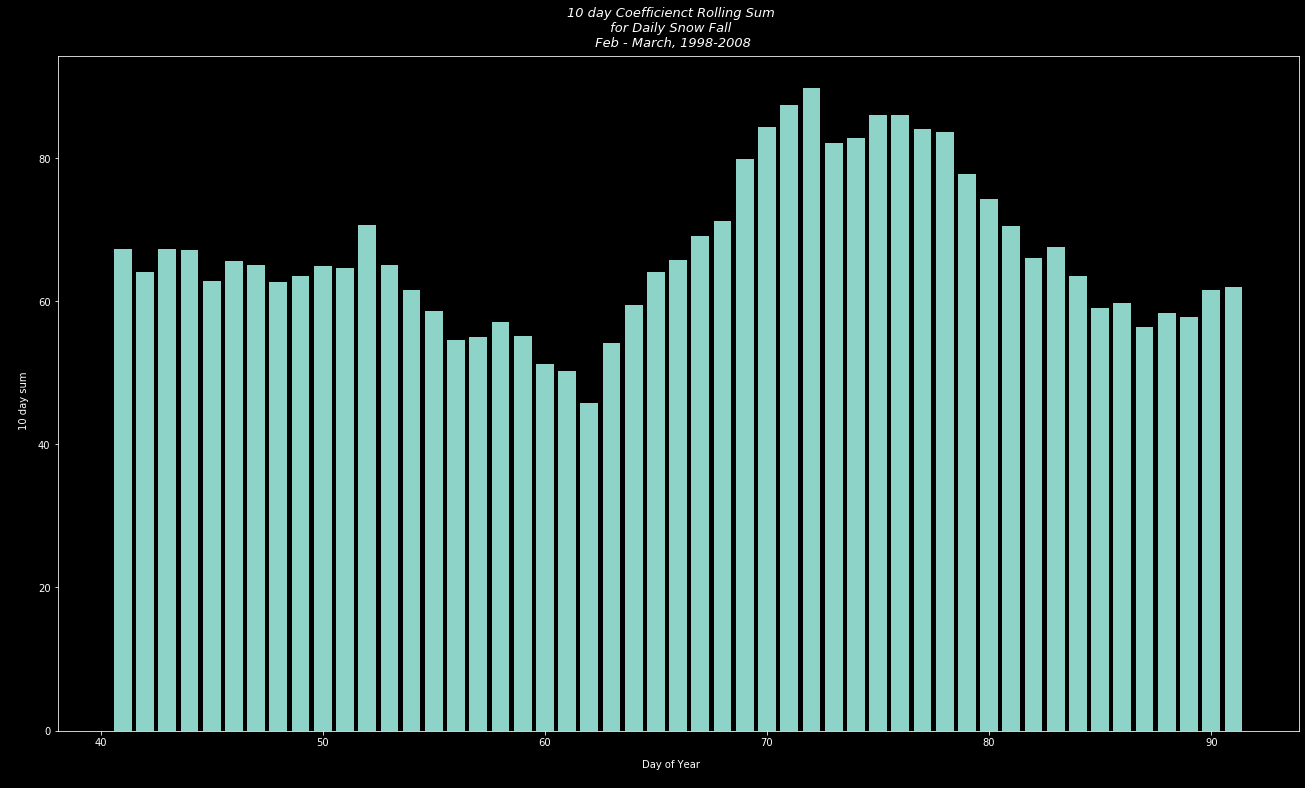

In [50]:
fig, axs = plt.subplots(nrows=1, ncols=1)

fig.suptitle("10 day Coefficienct Rolling Sum\n for Daily Snow Fall \n Feb - March, 1998-2008", 
             fontsize=13, 
             fontweight=0,
             color="white", 
             style="italic", 
             y=1.02)
fig.set_size_inches(18.5, 10.5)  
# label axes
fig.text(0.5, 0.01, "Day of Year\n", ha="center", va="center")
fig.text(0.01, 0.5, "\n10 day sum", ha="center", va="center", rotation='vertical')

# adjust layout so things aren't so squished
fig.tight_layout(pad = 3)
plt.bar(x=coef_df['Day_of_Year'], height = coef_df['10_day_snow_coef_sum'])

In [34]:
coef_df.loc[coef_df['10_day_snow_coef_sum']==coef_df['10_day_snow_coef_sum'].max()]

,Coef,Day_of_Year,10_day_snow_coef_sum
40,10.357143,72,89.785714


In [56]:
sort_coef = coef_df.sort_values('10_day_snow_coef_sum', ascending=False)
sort_coef.head()

,Coef,Day_of_Year,10_day_snow_coef_sum
40,10.357143,72,89.785714
39,8.071429,71,87.357143
44,6.000000,76,85.928571
43,9.928571,75,85.928571
38,7.500000,70,84.285714
